<a href="https://colab.research.google.com/github/caio-manduca/data_science_projects/blob/development/california_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./california_housing_train.csv')

data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


# Análise Exploratória

id - Identificação única de cada local<br>
median_age - mediana das idades<br>
total_rooms - total de cômodos na região<br>
total_bedrooms - total de quartos na região<br>
population - população total na região<br>
households - número total de casas na região<br>
median_income - mediana da renda das pessoas na região (em dezenas de milhares por ano)<br>
median_house_value - mediana dos valores das casas da região (variável alvo)

In [4]:
data.describe(include = 'all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


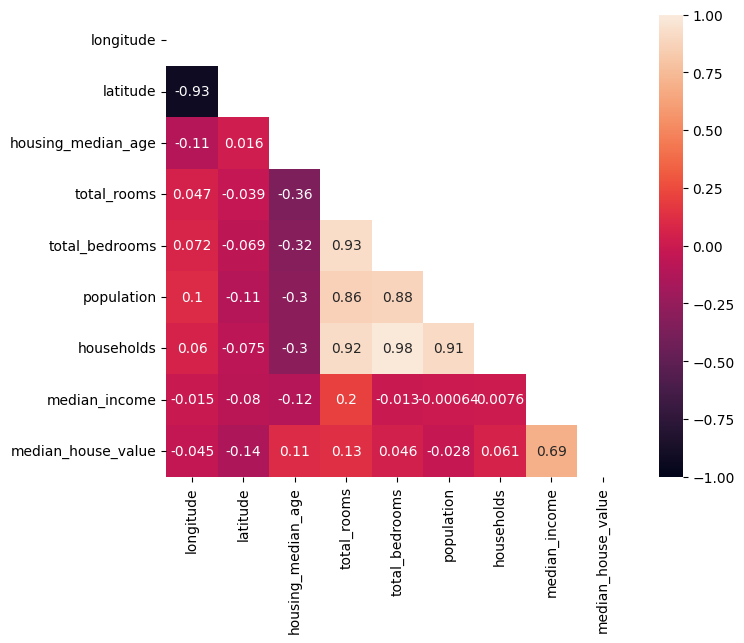

In [16]:
mask = np.triu(np.ones_like(data.corr()))

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), mask=mask, square=True, annot=True, vmin=-1, vmax=1)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

X = data[features]
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knn = KNeighborsRegressor(3)
knn.fit(X_train, y_train)

knn_predictions = knn.predict(X_test)

mean_absolute_error(y_test, knn_predictions)

80061.0217156863

In [20]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor(random_state=1, min_samples_leaf=15)

decision_tree.fit(X_train, y_train)

decision_tree_predictions = decision_tree.predict(X_test)

mean_absolute_error(y_test, decision_tree_predictions)

39890.666095034176

In [22]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=1, n_jobs=-1, n_estimators=200)
random_forest.fit(X_train, y_train)

random_forest_predictions = random_forest.predict(X_test)

mean_absolute_error(y_test, random_forest_predictions)

32945.016236764706